In [1]:
"""
Importing necessary libraries 
"""
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
"""
Reading the data
"""
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
"""
Creating a copy of the data for analysis
"""
bnb = data.copy()

In [4]:
"""
Checking first five rows of the data
"""
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
"""
list of column names 
"""
cols = ['latitude','longitude','price','minimum_nights','number_of_reviews',
        'reviews_per_month','calculated_host_listings_count','availability_365']

"""
This function creates a new dataframe from a preexisting one 
params: pre-existing dataframe, list of columns to be added to new dataframe
return: dataframe
rtype: pandas dataframe
"""
def create_from_df(df, data):
    return df[data]

In [6]:
bnb_df = create_from_df(bnb, cols)

In [7]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

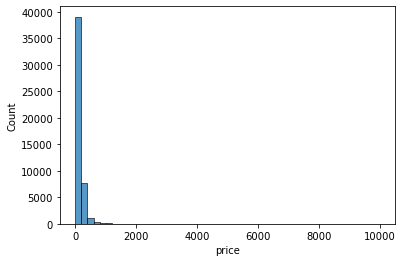

In [8]:
"""
Visualizing the price column of the dataframe
"""
sns.histplot(bnb_df['price'], bins=50)

The price column contains long tails, so we perform log transformation

Text(0.5, 0, 'Log Price')

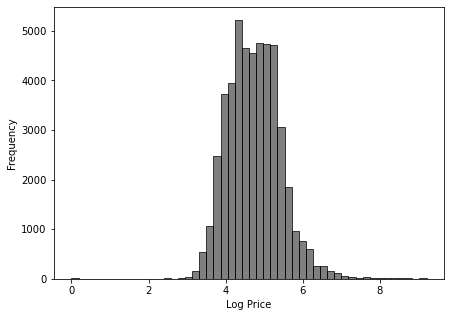

In [9]:
"""
Visualizing the log transformation of the price
"""
log_price = np.log1p(bnb_df.price)
plt.figure(figsize=(7,5))
sns.histplot(log_price, bins=50, color='black', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Log Price')

Now the price is closer to a normal distribution

In [10]:
"""
Checking the missing values in the data 
"""
bnb_df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Only the reviews per month have missing values<br>
The number of which is 10052

In [11]:
"""
The median of 'minimum-heights'
"""

print("The median minimum height is", bnb_df['minimum_nights'].median())

The median minimum height is 3.0


In [12]:
"""
Splitting the data into:
Training data, Validation data and Testing data
"""

#setting random seed 
np.random.seed(42)

#setting the percentage splits
n = len(bnb_df)

#60 percent for training
n_train = int(n * 0.6)

#20 percent for validation
n_val = int(n * 0.2)

#20 percent for validation
n_test = int(n * 0.2)

#shuffling the dataset
# idx = np.arange(n)
# np.random.shuffle(idx)

# bnb_df = bnb_df.iloc[idx].reset_index(drop=True)

# #Training data
train_df = bnb_df[:n_train]

#Validation data
val_df = bnb_df[n_train:n_train+n_val]

#Testing data
test_df = bnb_df[n_train+n_val:]

In [13]:
"""
Setting the target variable for the data splits
"""

#storing the original form of the target in each data set
y_train_orig = train_df.price.values
y_val_orig = val_df.price.values
y_test_orig = test_df.price.values

#performing log transform on the targets
y_train = np.log1p(train_df.price.values)
y_val = np.log1p(val_df.price.values)
y_test = np.log1p(test_df.price.values)

#deleting the target column from the data sets 
del train_df['price']
del val_df['price']
del test_df['price']

In [14]:
"""
This function takes in a pandas dataframe and a column name ,
and fills the missing values in the column with the mean or 0,
depending on the user 
params: pandas dataframe, column name
returns: dataframe with filled missing values 
rtype: pandas dataframe
"""
def fill_X(df, column):
    new_df = df.copy()
    option = input("\tEnter 1 for fill with 0\n\tEnter 2 for fill with mean\nEnter here:")
    if option == '1':
        new_df[column] = new_df[column].fillna(0)
        
    elif option == '2':
        new_df[column] = new_df[column].fillna(new_df[column].mean())
    
    else:
        print("invalid input")    
    
    return new_df

In [15]:
"""
This function takes in the feature matrix and the target vector,
and produces the weights to be used for linear regression
params: features, target
return: weights for bias and each feature
rtype: array
"""

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]    

In [16]:
"""
This function takes in a feature matrix and its weights,
and computes predicted target values
params: feature matrix, weights
return: predictions for feature matrix
rtype: array
"""
def predict(X, w_0, w):
    bias = w_0
    pred = bias + X.dot(w)
    return pred

In [17]:
"""
This function takes in the original target values and the predicted values,
and computes the root mean squared error
params: original target, predicted target
return: rmse 
rtype:float
"""
def rmse(y, y_pred):
    error = y - y_pred 
    mse = (error ** 2).mean()
    score = round(np.sqrt(mse),2)
    return score

In [78]:
"""
Calculating rmse for training dataset after filling missing data with 0
"""
X_train = fill_X(train_df, 'reviews_per_month')
X_train = X_train.values
w_0, w= train_linear_regression(X_train, y_train)
y_pred = predict(X_train, w_0, w)
print("The rmse for the training dataset after filling missing data with 0 = ", rmse(y_train, y_pred))

	Enter 1 for fill with 0
	Enter 2 for fill with mean
Enter here: 1


The rmse for the training dataset after filling missing data with 0 =  0.64


In [79]:
"""
Calculating rmse for training dataset after filling missing data with the mean
"""
X_train = fill_X(train_df, 'reviews_per_month')
X_train = X_train.values
w_0, w= train_linear_regression(X_train, y_train)
y_pred = predict(X_train, w_0, w)
print("The rmse for the training dataset after filling missing data with mean = ", rmse(y_train, y_pred))

	Enter 1 for fill with 0
	Enter 2 for fill with mean
Enter here: 2


The rmse for the training dataset after filling missing data with mean =  0.64


In [80]:
"""
Calculating rmse for validation dataset after filling missing data with 0
"""
X_val = fill_X(val_df, 'reviews_per_month')
X_val = X_val.values
w_0, w= train_linear_regression(X_val, y_val)
y_pred = predict(X_val, w_0, w)
print("The rmse for the validation dataset after filling missing data with 0 = ", rmse(y_val, y_pred))

	Enter 1 for fill with 0
	Enter 2 for fill with mean
Enter here: 1


The rmse for the validation dataset after filling missing data with 0 =  0.64


In [82]:
"""
Calculating rmse for validation dataset after filling missing data with the mean
"""
X_val = fill_X(val_df, 'reviews_per_month')
X_val = X_val.values
w_0, w= train_linear_regression(X_val, y_val)
y_pred = predict(X_val, w_0, w)
print("The rmse for the validation dataset after filling missing data with the mean = ",
      rmse(y_val, y_pred))

	Enter 1 for fill with 0
	Enter 2 for fill with mean
Enter here: 2


The rmse for the validation dataset after filling missing data with the mean =  0.65


The score is the same regardless of filling by zero or 1


In [22]:
"""
This function takes in the feature matrix, the target vector, and a regularization value
and produces the weights to be used for linear regression
params: features, target, regularization value
return: weights for bias and each feature
rtype: array
"""

def train_linear_regression_reg(X,y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    XTX = XTX + (r * np.eye(XTX.shape[0]))
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]    

In [84]:
"""
Determining the best r value by testing different values
"""
values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_train = fill_X(train_df, 'reviews_per_month')

for r in values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w_0, score)
    
    
    

	Enter 1 for fill with 0
	Enter 2 for fill with mean
Enter here: 1


0 -425.67580484315397 0.65
1e-06 -425.62534268688637 0.65
0.0001 -420.68812691035373 0.65
0.001 -380.55696043471886 0.65
0.01 -194.7634144164913 0.66
0.1 -33.109848849424424 0.68
1 -3.558954167745643 0.68
5 -0.7154825376290684 0.68
10 -0.3573864845251322 0.68


Regularization does not reduce the rmse 

In [86]:
"""
Using the best regularizatiobn value for validation
"""
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print(score)


0.65


In [87]:
def fill_zero(df, column):
    new_df = df.copy()
    new_df[column] = new_df[column].fillna(0)
    return new_df.values

In [88]:
#setting random seed 
scores_list = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)

    #setting the percentage splits
    n = len(bnb_df)

    #60 percent for training
    n_train = int(n * 0.6)

    #20 percent for validation
    n_val = int(n * 0.2)

    #20 percent for validation
    n_test = int(n * 0.2)

    #shuffling the dataset
    idx = np.arange(n)
    np.random.shuffle(idx)

    bnb_df = bnb_df.iloc[idx].reset_index(drop=True)

    #Training data
    train_df = bnb_df[:n_train]

    #Validation data
    val_df = bnb_df[n_train:n_train+n_val]
    
    #Testing data
    test_df = bnb_df[n_train+n_val:]
    
    y_train_orig = train_df.price.values
    y_val_orig = val_df.price.values
    y_test_orig = test_df.price.values

    #performing log transform on the targets
    y_train = np.log1p(train_df.price.values)
    y_val = np.log1p(val_df.price.values)
    y_test = np.log1p(test_df.price.values)

    #deleting the target column from the data sets 
    del train_df['price']
    del val_df['price']
    del test_df['price']
    
    X_train = fill_zero(train_df, 'reviews_per_month')
    w_0, w= train_linear_regression_reg(X_train, y_train, r=0.0)
    y_pred = predict(X_val, w_0, w)
    score =  rmse(y_val, y_pred)
    print("seed = ", i , ": The rmse for the training dataset after filling missing data with 0 = ", score)
    scores_list.append(score)

seed =  0 : The rmse for the training dataset after filling missing data with 0 =  0.73
seed =  1 : The rmse for the training dataset after filling missing data with 0 =  0.75
seed =  2 : The rmse for the training dataset after filling missing data with 0 =  0.75
seed =  3 : The rmse for the training dataset after filling missing data with 0 =  0.74
seed =  4 : The rmse for the training dataset after filling missing data with 0 =  0.75
seed =  5 : The rmse for the training dataset after filling missing data with 0 =  0.74
seed =  6 : The rmse for the training dataset after filling missing data with 0 =  0.75
seed =  7 : The rmse for the training dataset after filling missing data with 0 =  0.75
seed =  8 : The rmse for the training dataset after filling missing data with 0 =  0.75
seed =  9 : The rmse for the training dataset after filling missing data with 0 =  0.73


In [90]:
"""
Finding the standard devaition of all the rmse
"""
np.round(np.std(scores_list),3)

0.008

In [93]:
"""
Training the model with random seed set to 9,
And using it on test data set
"""
np.random.seed(9)
n = len(bnb_df)

#60 percent for training
n_train = int(n * 0.6)

#20 percent for validation
n_val = int(n * 0.2)

#20 percent for validation
n_test = int(n * 0.2)

#Training data
train_df = bnb_df[:n_train]

#Validation data
val_df = bnb_df[n_train:n_train+n_val]

#Testing data
test_df = bnb_df[n_train+n_val:]

y_train_orig = train_df.price
y_val_orig = val_df.price
y_test_orig = test_df.price.values

#performing log transform on the targets
y_train = np.log1p(train_df.price.values)
y_val = np.log1p(val_df.price.values)
y_test = np.log1p(test_df.price.values)

#deleting the target column from the data sets 
del train_df['price']
del val_df['price']
del test_df['price']

df_full_train = pd.concat([train_df, val_df])
y_full_train = np.concatenate([y_train, y_val])

X_full_train = fill_zero(df_full_train, 'reviews_per_month')

w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0)

X_test = fill_zero(test_df, 'reviews_per_month')

y_pred = predict(X_test, w_0, w)
score = rmse(y_test, y_pred)
print("test score",  score)

test score 0.66


Although not a very good score, the model works better with the test data